In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("E:\datasets\data.csv")

label = "calories"

X = np.array(df.drop([label], 1))
Y = np.array(df[label])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
initial_m = 0
initial_b = 0

In [4]:
def SSE(m, b, testX, testy):
    totalError = 0.0
    for i in range(len(testX)):
        x = testX[i]
        y = testy[i]
        
        error = (y - x) ** 2
        
        totalError += error
        
    sse = error / float(len(testX))
    
    return sse


def gradient_step(m, b, Xtrain, ytrain, learning_rate):
    m_grad = 0
    b_grad = 0
    N = float(len(Xtrain))
    
    for j in range(len(Xtrain)):
        x = Xtrain[j]
        y = ytrain[j]
        
        dm = -(2/N) * x * (y - (m * x + b))
        db = -(2/N) * (y - (m * x + b))
        
        m_grad += dm
        b_grad += db
    
    m_new = m - m_grad * learning_rate
    b_new = b - b_grad * learning_rate
    
    return m_new, b_new

def gradient_descent(starting_m, starting_b, X_train, y_train, learning_rate=0.0001, epochs=1000):
    m = starting_m
    b = starting_b
    
    for i in range(epochs):
        m, b = gradient_step(m, b, X_train, y_train, learning_rate)
        
    return m, b

In [5]:
m, b = gradient_descent(initial_m, initial_b, X_train, y_train)

In [6]:
print(SSE(m, b, X_test, y_test))

for i in range(len(X_test)):
    print('\nPrediction: %.6f \nActual value: %.6f\n' %(X_test[i] * m + b, y_test[i]))


[43.4412058]

Prediction: 82.828166 
Actual value: 85.498068


Prediction: 56.274877 
Actual value: 80.166275


Prediction: 84.853965 
Actual value: 74.084130


Prediction: 60.672561 
Actual value: 59.358850


Prediction: 82.349521 
Actual value: 79.550437


Prediction: 60.789520 
Actual value: 61.684038


Prediction: 78.842224 
Actual value: 68.777596


Prediction: 48.638880 
Actual value: 67.170656


Prediction: 70.068319 
Actual value: 71.546632


Prediction: 83.708067 
Actual value: 81.436192


Prediction: 47.992930 
Actual value: 31.707006


Prediction: 72.616305 
Actual value: 84.742698


Prediction: 72.250676 
Actual value: 60.723602


Prediction: 74.064825 
Actual value: 69.847604


Prediction: 61.078059 
Actual value: 79.102830


Prediction: 77.068903 
Actual value: 63.358790


Prediction: 48.864969 
Actual value: 50.719589


Prediction: 84.854091 
Actual value: 91.486778


Prediction: 88.971556 
Actual value: 97.379897


Prediction: 65.256297 
Actual value: 73.687564



In [7]:
import matplotlib.pyplot as plt

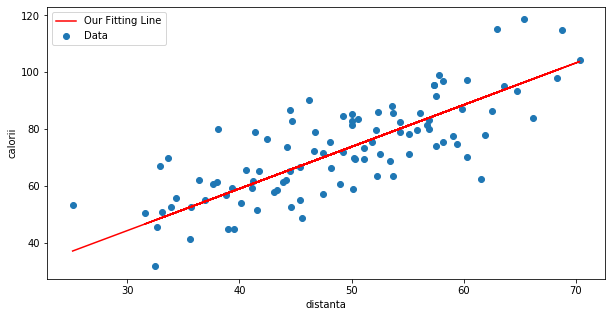

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x=X,y=y,label='Data')
plt.plot(X, m*X + b,color='red',label='Our Fitting Line')
ax.set_xlabel('distanta')
ax.set_ylabel('calorii')
ax.legend(loc='best')

plt.show()